In [5]:
''' Import packages. '''
# Time packages
import calendar, cftime, datetime, time
# Numerical analysis packages
import numpy as np, random, scipy, numba
# Local data storage packages
import functools, importlib, os, pickle, collections, sys

import pandas as pd, xarray as xr, nc_time_axis
xr.set_options(keep_attrs=True)
# Visualization tools
import cartopy, cartopy.util as cutil, cartopy.crs as ccrs, matplotlib, matplotlib.pyplot as plt

import analysis, visualization_aqp, visualization
importlib.reload(analysis)
importlib.reload(visualization_aqp)

# Local imports
sys.path.insert(1, '/projects/GEOCLIM/gr7610/scripts')
import derived, utilities, visualization
importlib.reload(derived);
importlib.reload(utilities);
importlib.reload(visualization);

#### Runtime diagnostic plots
These plots check status fields (e.g., TOA net radiation, SST, etc.) to ensure proper energetics prior to analyzing.

In [6]:
def run_diagnostics(configuration_names: list[str],
                    data_type: str='atmos_month',
                    npes: int=540,
                    field_names: list[str]=['netrad_toa', 't_surf']):

    ''' Method to generate timeseries of diagnostic variables for a model run. '''
        
    # Container for data to be analyzed
    data = {} 
    # Load the data
    for configuration_name in configuration_names:
        assert len(configuration_name.split('-')) == 2, 'Configuration name must be of format {MODEL_NAME}-{EXPERIMENT_NAME}.'
        model_name, experiment_name = configuration_name.split('-')
        
        # Get pathnames
        root_dirname = f'/scratch/gpfs/GEOCLIM/gr7610/tiger3/{model_name}/work/{experiment_name}_tiger3_intelmpi_24_{npes}PE/POSTP'
        pathnames = [os.path.join(root_dirname, f) for f in os.listdir(root_dirname)
                     if data_type in f]
        data[configuration_name] = xr.open_mfdataset(pathnames)
        
    # Generate the plots from the provided field names
    for field_name in field_names:
        visualization_aqp.plot_global_mean(data=data,
                                           field_name=field_name)

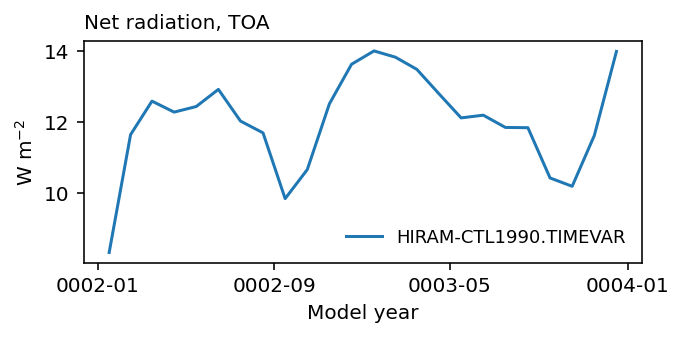

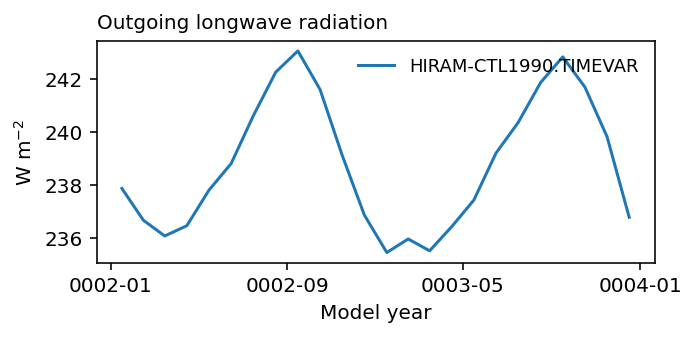

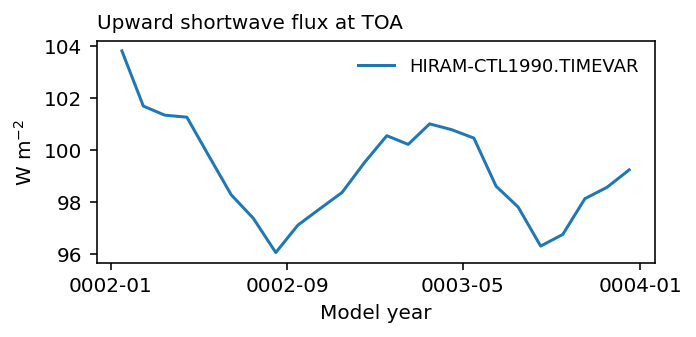

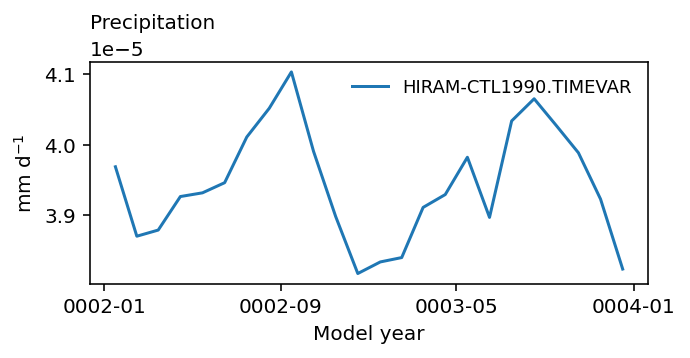

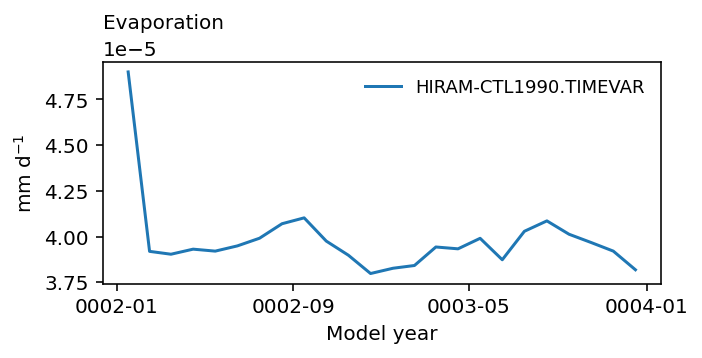

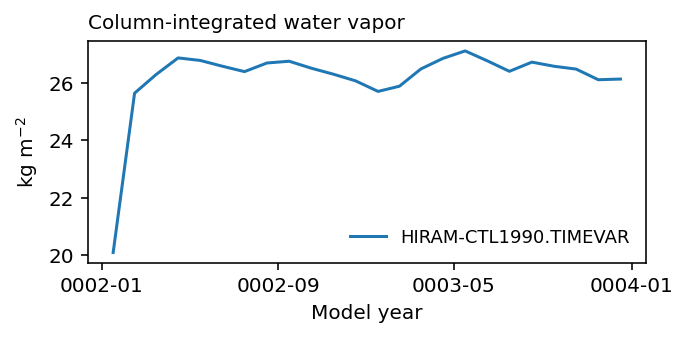

In [8]:
# Define input parameters
configuration_names = ['HIRAM-CTL1990.TIMEVAR']
data_type = 'atmos_month'
npes = 540
field_names = ['netrad_toa', 'olr', 'swup_toa', 'precip', 'evap', 'WVP']

run_diagnostics(configuration_names=configuration_names,
                data_type=data_type,
                npes=npes,
                field_names=field_names)

#### Difference plots

AM2.5 CTL1990.CONST (8, 13)
Data loaded from refined postprocessed data.
AM2.5 CTL1990_SWISHE.CONST (8, 13)
Data loaded from refined postprocessed data.
AM2.5 CTL1990.CONST (8, 13) (1, 13)
[visualization.TC_density_histogram] loading TC tracks for model AM2.5, experiment CTL1990.CONST, over years (8, 13)...
AM2.5 CTL1990_SWISHE.CONST (8, 13) (1, 13)
[visualization.TC_density_histogram] loading TC tracks for model AM2.5, experiment CTL1990_SWISHE.CONST, over years (8, 13)...
AM2.5 CTL1990.CONST (8, 13) (1, 13)
[visualization.TC_density_histogram] loading TC tracks for model AM2.5, experiment CTL1990.CONST, over years (8, 13)...
AM2.5 CTL1990_SWISHE.CONST (8, 13) (1, 13)
[visualization.TC_density_histogram] loading TC tracks for model AM2.5, experiment CTL1990_SWISHE.CONST, over years (8, 13)...
AM2.5 CTL1990.CONST (8, 13) (1, 13)
[visualization.TC_density_histogram] loading TC tracks for model AM2.5, experiment CTL1990.CONST, over years (8, 13)...
AM2.5 CTL1990_SWISHE.CONST (8, 13) (1, 

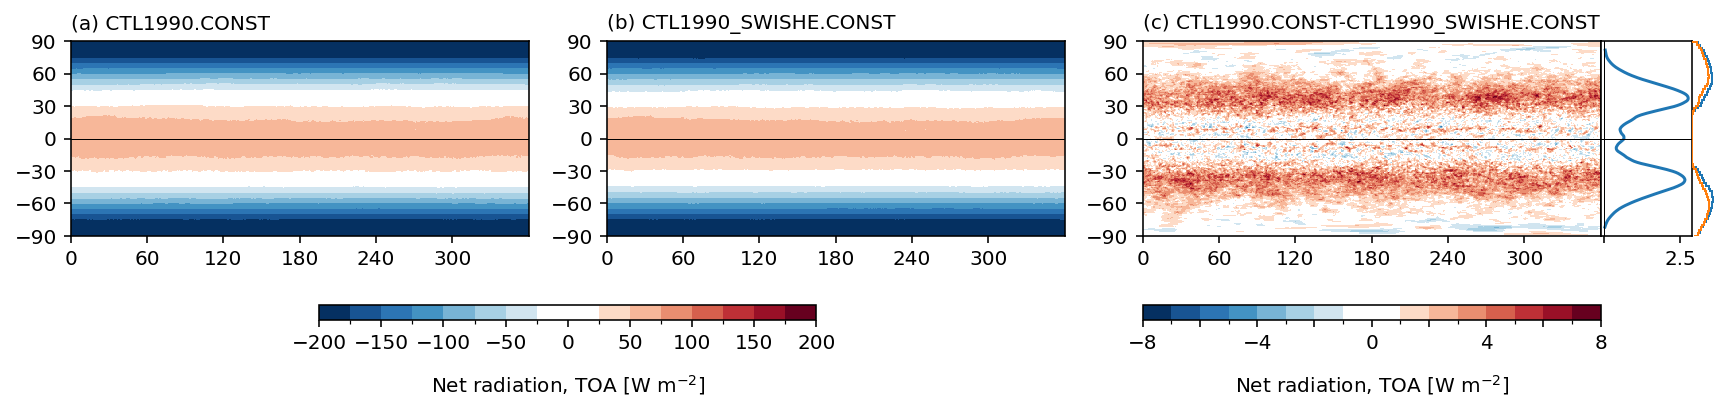

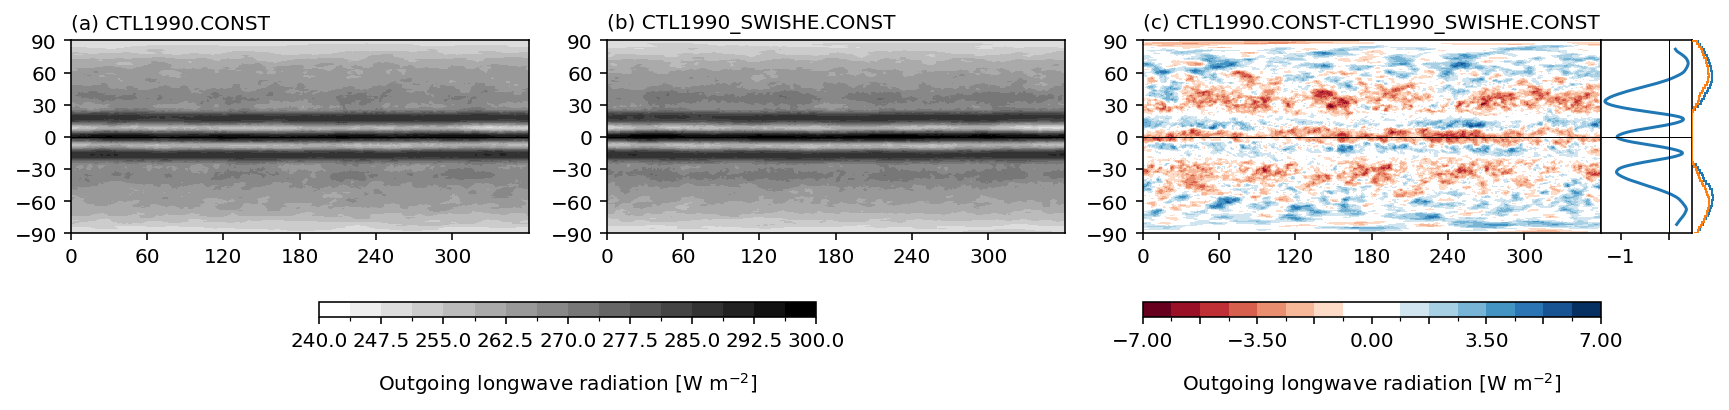

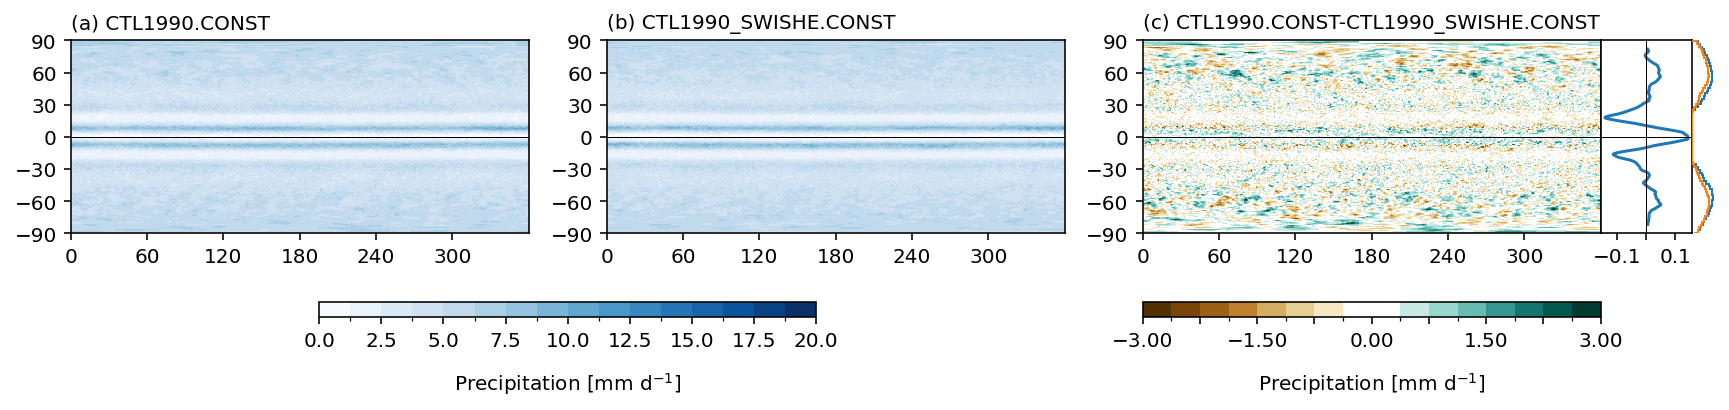

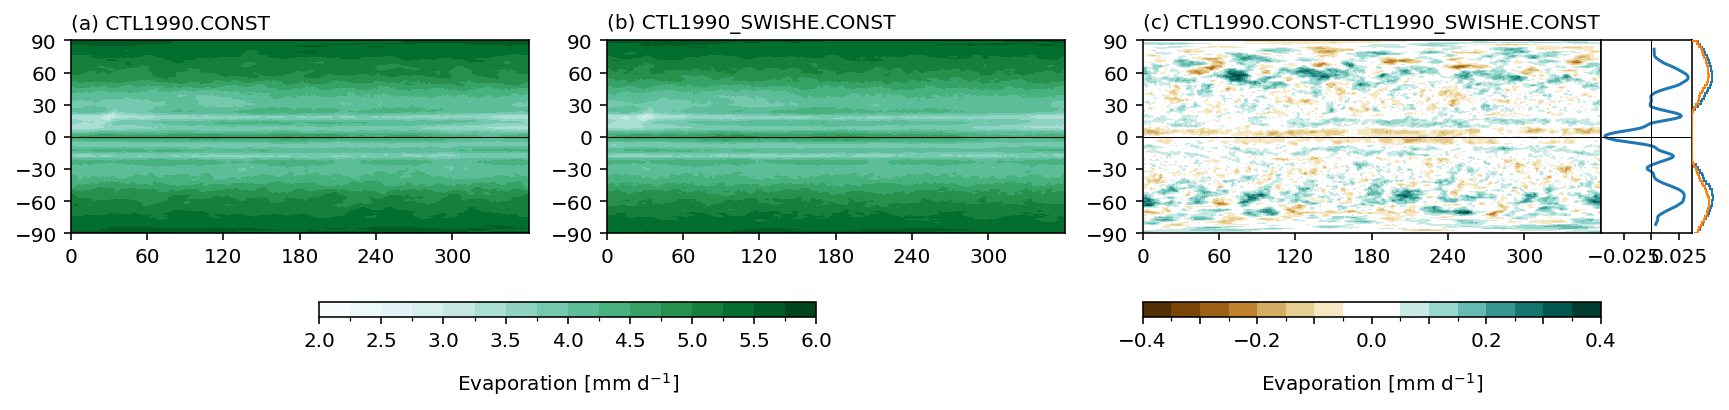

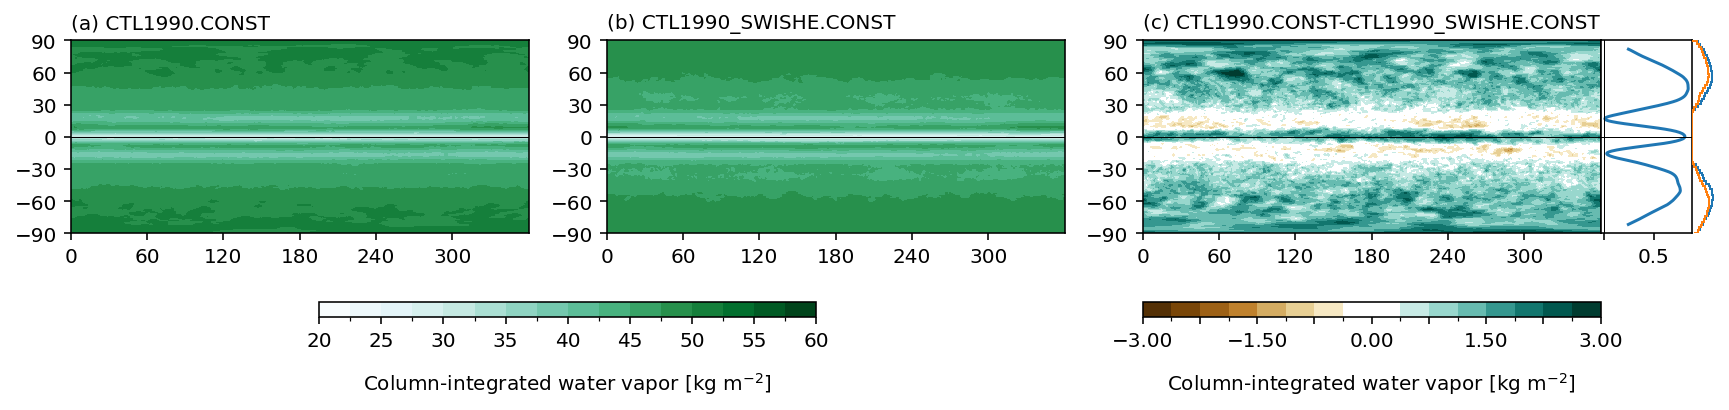

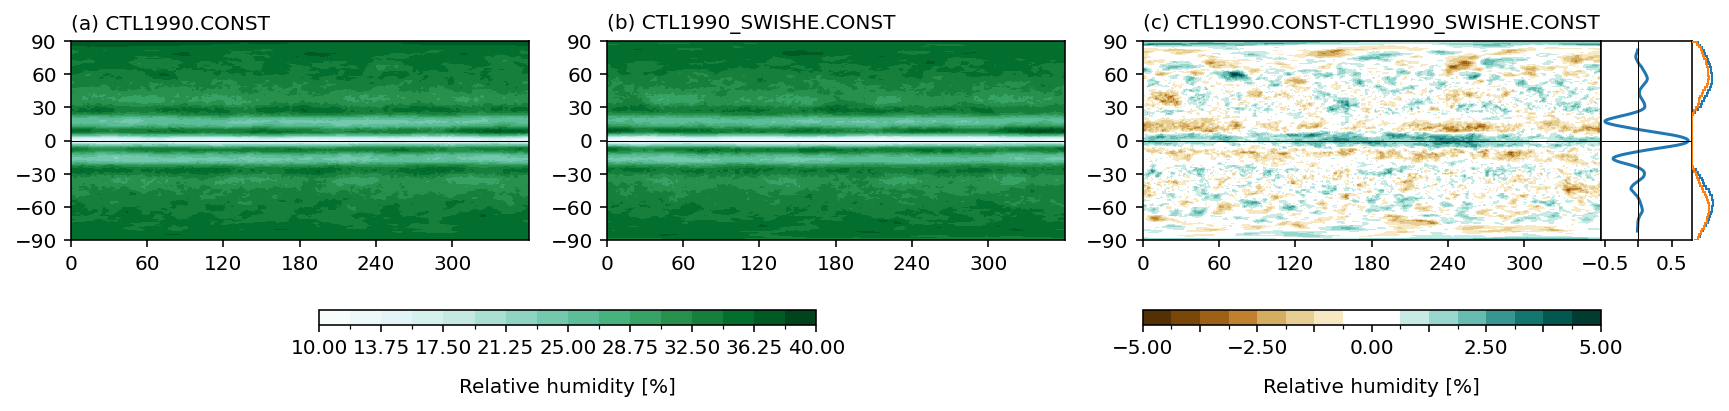

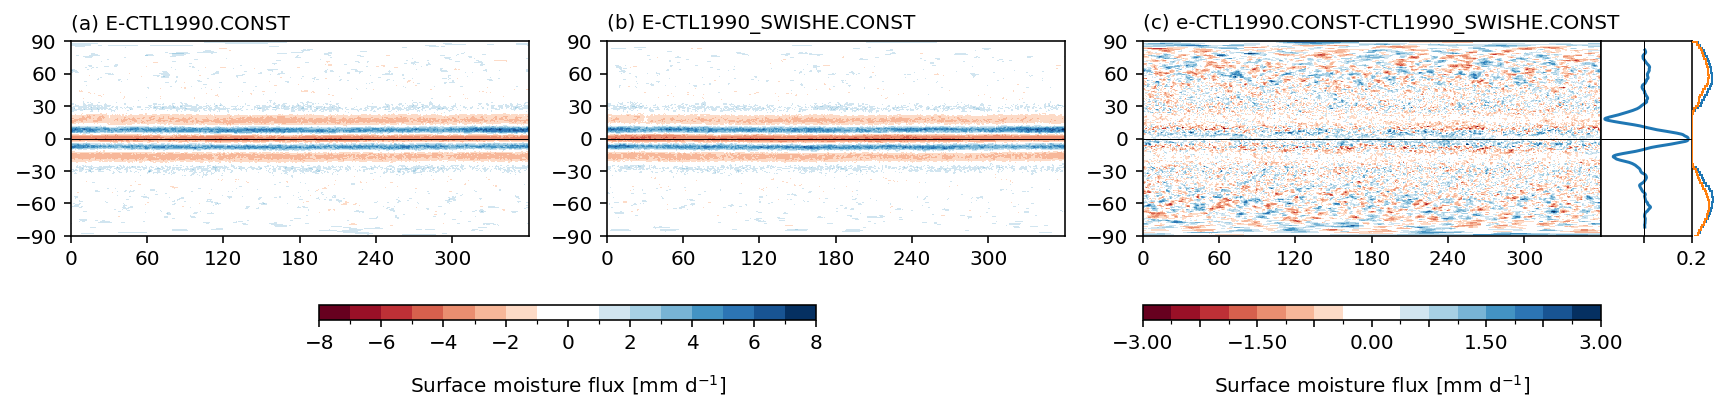

In [3]:
importlib.reload(utilities)
importlib.reload(analysis)
importlib.reload(visualization_aqp)

model_name = 'AM2.5'
experiment_names = ['CTL1990.CONST', 'CTL1990_SWISHE.CONST']
year_range = (8, 13)

# model_name = 'HIRAM'
# experiment_names = ['CTL1990.TIMEVAR', 'CTL1990_SWISHE.TIMEVAR']
# year_range = (3, 11)

field_names = ['netrad_toa', 'olr', 'precip', 'evap', 'WVP', 'rh']
data_type = 'atmos_month'
data = analysis.load_GCM_data(model_name=model_name, 
                              experiment_names=experiment_names,
                              field_names=field_names,
                              year_range=year_range,
                              data_type=data_type)

data = analysis.derived_fields(data=data)
if 'precip' in field_names and 'evap' in field_names:
    field_names.append('p-e')

for field_name in field_names:
    visualization_aqp.plot_experiment_means_2D(data=data,
                                               model_name=model_name,
                                               experiment_names=experiment_names,
                                               field_name=field_name,
                                               plot_TC_histogram=True,
                                               year_range=year_range,
                                               savefig=False)

#### Multi-experiment 1D difference plots

In [ ]:
importlib.reload(visualization_aqp)
experiment_configurations = {'AM2.5-0N': {'name': 'AM2.5:CTL1990.TIMEVAR-CTL1990_SWISHE.TIMEVAR',
                                       'year_range': (8, 13)},
                             'HIRAM-0N': {'name': 'HIRAM:CTL1990.TIMEVAR-CTL1990_SWISHE.TIMEVAR',
                                       'year_range': (3, 8)}}

data_type = 'month'
field_names = ['netrad_toa']
for field_name in field_names:
    print(f'{''.join(["-"]*48)}\nProcessing data for field {field_name}...')
    visualization_aqp.plot_multiexperiment_means_1D(experiment_configurations=experiment_configurations,
                                                    field_name=field_name,
                                                    data_type=data_type,
                                                    savefig=False)

#### Multiexperiment 2D difference plots

In [ ]:
importlib.reload(visualization_aqp)
for field_name in ['netrad_toa', 'olr', 'precip', 'evap']:
    visualization_aqp.plot_experiment_difference_2D(data=data,
                                                    model_name=model_name,
                                                    experiment_names=experiment_names,
                                                    field_name=field_name,
                                                    plot_TC_histogram=True,
                                                    year_range=(2, 20))

In [ ]:
for field_name in ['rh']:
    visualization_aqp.plot_experiment_difference(data=data,
                                                 model_name=model_name,
                                                 experiment_names=experiment_names,
                                                 field_name=field_name,
                                                 dimension_x_axis='grid_yt',
                                                 dimension_y_axis='pfull',
                                                 plot_type='contourf')

#### Overturning circulation

In [ ]:
def generate_field_plot_data(data,
                             field_name,
                             averaging_dimensions: str | list[str],
                             contour_levels: int=8):
    
    average = data[field_name].mean(averaging_dimensions)
    norm, cmap = visualization.norm_cmap(average, field=field_name, num_bounds=contour_levels)

    return average, norm, cmap

In [ ]:
model_name = 'AM2.5'
experiment_name = 'CTL1990.10N'
field_names = ['ucomp', 'vcomp']
data_type = 'atmos_daily'

root_dirname = f'/scratch/gpfs/GEOCLIM/gr7610/tiger3/{model_name}/work/{experiment_name}_tiger3_intelmpi_24_540PE/POSTP'
pathnames = sorted([os.path.join(root_dirname, f) for f in os.listdir(root_dirname)
                    if f.endswith('.nc')
                    and data_type in f])

data = xr.open_mfdataset(pathnames[-1])[field_names].load()

In [ ]:
data = utilities.meridional_overturning(data)

In [ ]:
dataset_field_name = 'psi_m'
overlay_field_name = 'ucomp'
dataset, norm, cmap = generate_field_plot_data(data, 
                                               field_name=dataset_field_name, 
                                               averaging_dimensions=['time'],
                                               contour_levels=16)
overlay_dataset, overlay_norm, overlay_cmap = generate_field_plot_data(data, 
                                                                       field_name=overlay_field_name, 
                                                                       averaging_dimensions=['grid_xt', 'time'])

fig, ax = plt.subplots(figsize=(5, 2.5), dpi=144)

# Plot baseline figure
ax.contourf(dataset.grid_yt, dataset.pfull, dataset.T, 
            norm=norm, cmap=cmap, levels=len(norm.boundaries))

# Plot overlay
overlay_contours = ax.contour(overlay_dataset.grid_yt, overlay_dataset.pfull, 
                              overlay_dataset, norm=overlay_norm, colors=['grey'],
                              linewidths=1, levels=len(overlay_norm.boundaries))
overlay_contour_labels = ax.clabel(overlay_contours)

cax = ax.inset_axes([1.025, 0, 0.025, 1])
colorbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm, cmap), cax=cax)
long_name, units = visualization.field_properties(dataset_field_name)
colorbar.set_label(f'{units}', labelpad=15, rotation=270)

ax.set_xticks(np.arange(-60, 90, 30))
ax.set_yticks([200, 500, 850, 1000])

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('Latitude [deg N]')
ax.set_ylabel('Pressure level [hPa]')
ax.set_title(f'{experiment_name.upper()}', loc='left', ha='left', fontsize=10)

fig.tight_layout()